# COVID-19 Mortality Prediction with Reccurent Neural Network Deep Learning Model

## Project Setup

### Dependencies importing

In [1]:
# Auto reload imported module every time a jupyter cell is executed
%load_ext autoreload
%autoreload 2
# covid_ts_pred package
from covid_ts_pred.c_eng.engineering import *
from covid_ts_pred.models.ml_logic import preprocessor
from covid_ts_pred.c_model.cc_mach_learn.sequencing import subsample_sequence, subsample_sequence_2, get_X_y, get_X_y_2
from covid_ts_pred.c_model.cd_deep_learn.RNN_model import model_run, get_RNN_model_API
from covid_ts_pred.b_data_prep.ba_preproc.preprocessor import train_test_set

ModuleNotFoundError: No module named 'project'

In [2]:
import numpy as np
import pandas as pd
import scipy
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import requests
import pandas_profiling
from typing import overload
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import RMSprop
from sklearn.preprocessing import MinMaxScaler, StandardScaler

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

## Data loading

In [3]:
data_dir = get_raw_data_path()

df_raw_gov_response = pd.read_csv(data_dir + 'government_response_index_avg.csv')
df_raw_health = pd.read_csv(data_dir + 'containment_health_index_avg.csv')
df_raw_economic = pd.read_csv(data_dir + 'economic_support_index.csv')

#### Vaccination
df_raw_vaccination = pd.read_csv(data_dir + 'vaccinations.csv')
df_raw_ages = pd.read_csv(data_dir + 'vaccinations-by-age-group.csv')


#### Data Frame target
df_raw_cases = pd.read_csv(data_dir + 'confirmed_cases.csv')
df_raw_deaths = pd.read_csv(data_dir + 'confirmed_deaths.csv')

#### Data multiple
df_raw_school_closing=pd.read_csv(data_dir + 'c1m_school_closing.csv')
df_raw_workplace_closing=pd.read_csv(data_dir + 'c2m_workplace_closing.csv')
df_raw_cancel_public_event=pd.read_csv(data_dir + 'c3m_cancel_public_events.csv')
df_raw_restriction_on_gathering=pd.read_csv(data_dir + 'c4m_restrictions_on_gatherings.csv')
df_raw_stay_at_home=pd.read_csv(data_dir + 'c6m_stay_at_home_requirements.csv')
df_raw_international_travel=pd.read_csv(data_dir + 'c6m_stay_at_home_requirements.csv')
df_raw_goverment_response=pd.read_csv(data_dir + 'government_response_index_avg.csv')
df_raw_facial_covering=pd.read_csv(data_dir + 'h6m_facial_coverings.csv')
df_raw_vacination_policy=pd.read_csv(data_dir + 'h7_vaccination_policy.csv')


### **Read out CSV** and **Set dataframe**

## DataFrames setting

In [4]:
#### CSV Data out project directory
csv_dir = '../data/out_csv/'
# ! unzip {csv_dir}usa_index
# ! unzip {csv_dir}usa_indicator
# ! rm ECG_data.zip
df_fr_index =  pd.read_csv(csv_dir + 'index_FRA.csv')
df_fr_indicator =  pd.read_csv(csv_dir + 'indicator_FRA.csv')
df_fr_index, df_fr_indicator


# Sumedha csv test
df_ts_fra_index =  df_fr_index.copy()
df_ts_fra_indicator =  df_fr_indicator.copy()

df_ts_fra_index.head(), df_ts_fra_indicator.head()

(         date  cancel_public_events  school_closing  \
 0  2020-02-15                   0.0             0.0   
 1  2020-02-16                   0.0             0.0   
 2  2020-02-17                   0.0             0.0   
 3  2020-02-18                   0.0             0.0   
 4  2020-02-19                   0.0             0.0   
 
    restrictions_on_gathering  close_public_transport  \
 0                        0.0                     0.0   
 1                        0.0                     0.0   
 2                        0.0                     0.0   
 3                        0.0                     0.0   
 4                        0.0                     0.0   
 
    stay_at_home_requirements  restrictions_on_internal_movement  \
 0                        0.0                                0.0   
 1                        0.0                                0.0   
 2                        0.0                                0.0   
 3                        0.0                 

In [5]:
df_ts_fra_indicator = df_ts_fra_indicator.set_index('date')
X_ts_fra_indicator = df_ts_fra_indicator.drop(columns=['total_deaths','new_deaths','new_cases'])
y_ts_fra_indicator = df_ts_fra_indicator['total_deaths']

## TENSORFLOW & RNN MODEL

### Recurrent Neural Network (sequences data) modeling

### Samples/Sequences, Observations, Features

X.shape = (n_SEQUENCES, n_OBSERVATIONS, n_FEATURES) and y = RNN(X) where $X_{i,j}^{t}$

with $_{i}$ is the sample/sequence, $_{j}$ is the feature measured and  $^{t}$ is the time at which the observation is seen



### Prerequisites:

- **retrieve dataset** from Sumedha & Alberto

    - **clean dataset**: 
        
        - **drop first lines == 0** *(before Covid arrived)*
        
        - **check Nan**: 
- **strategy 1 country by country** sequences split as follow:

- **strategy 2 one sequence per country**:
    - **split X train, set** 
    - **Pad sequences**
    - **create one csv per country**

## Training strategies:
- Get NB dataset (cleaned) from Alberto & Sumedha
- 1/ Indicator in precentage %
- 2/ Indicator as categorical labels
- Run same RNN model in parallel with Kim & Thomas
- Identify best dataset
- Parameters to fit:
    - increase **nb of sequences**
    - train series modulation (ex: [50, 150, 200, 300, 400 nb of days = n_obs]) < take time to compute
    - **learning_rate** in Optimizer(parameters)
    - model layers architecture (**simple** -> complex) (less data -> more data) (print(loss) function check lecture)
        > LSTM
        > Dense
       (> LSTM
        > LSTM
        > Dense)
     >> **try to overfit** the model with the loss (train over val) or (early_stopping)
     >> **(X_val, y_val)**

## **RNN** models on **FRA** country with **Alberto**'s datasets

In [22]:
# Alberto train set
n_seq = 200 ## nb of sequences (samples)
n_obs = 70 # maxi = 96 (stay around 70 or more test_split)
n_feat = 20 #  X_train.shape[1] # 20 feature:
n_pred = 10 # nb of days where we can predict new daily deaths
n_pred = 1 ## <<< REMOVE AFTER OK TESTING!
n_seq_val = n_seq // 5 # number of sequences in test set ?
n_seq_test = n_seq // 10 # number of sequences in test set ?
print('n_seq\t\t', n_seq, '\nn_seq_val\t', n_seq_val, '\nn_seq_test\t', n_seq_test, '\nn_obs\t\t', n_obs, '\nn_feat\t\t', n_feat)

n_seq		 200 
n_seq_val	 40 
n_seq_test	 20 
n_obs		 70 
n_feat		 20


### Train Splitting

Split the dataset into training, validation, and test data

In [23]:
# Alberto train set
X_train, y_train, X_val, y_val, X_test, y_test = train_test_set('France', split_train=0.7, split_val=0.9)
print('X_train.shape\t', X_train.shape, '\t->\ty_train shape\t', y_train.shape, '\nX_val.shape\t', X_val.shape, '\t->\ty_val shape\t', y_val.shape, '\nX_test.shape\t', X_test.shape, '\t->\ty_test shape\t', y_test.shape)

X_train.shape	 (673, 21) 	->	y_train shape	 (673,) 
X_val.shape	 (192, 21) 	->	y_val shape	 (192,) 
X_test.shape	 (97, 21) 	->	y_test shape	 (97,)


#### Create sequences (`X`,`y`, `X_len`, `y_len`)

##### Generates an entire dataset of multiple subsamples with shape $(X, y)$

In [24]:
X_test, y_test = get_X_y_2(X_test, y_test, X_len=n_obs, y_len=n_pred, n_sequences=n_seq_test)
print('n_seq_test / n_obs / n_feat', n_seq_test, n_obs, n_feat, '\nX_test.shape', X_test.shape, 'y_test.shape', y_test.shape) 

n_seq_test / n_obs / n_feat 20 70 20 
X_test.shape (20, 70, 21) y_test.shape (20, 1)


In [25]:
X_train, y_train = get_X_y_2(X_train, y_train, X_len=n_obs, y_len=n_pred, n_sequences=n_seq)
print('n_seq / n_obs / n_feat', n_seq, n_obs, n_feat, '\nX_train.shape', X_train.shape, 'y_train.shape', y_train.shape) 

n_seq / n_obs / n_feat 200 70 20 
X_train.shape (200, 70, 21) y_train.shape (200, 1)


In [26]:
X_val, y_val = get_X_y_2(X_val, y_val, X_len=n_obs, y_len=n_pred, n_sequences=n_seq_val)
print('n_seq_val / n_obs / n_feat', n_seq_val, n_obs, n_feat, '\nX_val.shape', X_val.shape, 'y_val.shape', y_val.shape) 

n_seq_val / n_obs / n_feat 40 70 20 
X_val.shape (40, 70, 21) y_val.shape (40, 1)


##### How to split sequences?



- randomly or

- manually

##### **train_rnn_model(model, patience=2, epochs=200):**

function to generates an entire dataset of multiple subsamples suitable for RNN, that is, $(X, y)$ of shape:

```python
X.shape = (n_sequences, length, n_features)
y.shape = (n_sequences, )
```

### Model #4 Training

In [27]:
print('X_train.shape\t', X_train.shape, '\t->\ty_train shape\t', y_train.shape, '\nX_val.shape\t', X_val.shape, '\t->\ty_val shape\t', y_val.shape, '\nX_test.shape\t', X_test.shape, '\t->\ty_test shape\t', y_test.shape)
print('type(X_train)\t', type(X_train), '\t->\ttype(y_train)\t', type(y_train), '\ntype(X_val)\t', type(X_val), '\t->\ttype(y_val)\t', type(y_val), '\ntype(X_test)\t', type(X_test), '\t->\ttype(y_test)\t', type(y_test))


X_train.shape	 (200, 70, 21) 	->	y_train shape	 (200, 1) 
X_val.shape	 (40, 70, 21) 	->	y_val shape	 (40, 1) 
X_test.shape	 (20, 70, 21) 	->	y_test shape	 (20, 1)
type(X_train)	 <class 'numpy.ndarray'> 	->	type(y_train)	 <class 'numpy.ndarray'> 
type(X_val)	 <class 'numpy.ndarray'> 	->	type(y_val)	 <class 'numpy.ndarray'> 
type(X_test)	 <class 'numpy.ndarray'> 	->	type(y_test)	 <class 'numpy.ndarray'>


### LET TEST IT NOW!

model_run(country_name=
          'France', n_seq=200, n_obs=[55, 60, 65, 70], n_feat=20, n_pred=1, split_train=0.7, split_val=0.9, learning_rates=[0.001, 0.01, 0.1])

n_seq		 200 
n_seq_val	 40 
n_seq_test	 20 
n_obs		 60 
n_feat		 20 
n_pred		 10
X_train	 (673, 21) 	->	y_train	 (673,) 
X_val	 (192, 21) 	->	y_val	 (192,) 
X_test	 (97, 21) 	->	y_test	 (97,)
X_train_seq (200, 60, 21) 	->	y_train_seq	 (200, 10) 
X_val_seq (40, 60, 21) 	->	y_val_seq	 (40, 10) 
X_test_seq (20, 60, 21) 	->	y_test_seq	 (20, 10)
Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_96 (LSTM)              (None, 60, 20)            3360      
                                                                 
 lstm_97 (LSTM)              (None, 10)                1240      
                                                                 
 dense_72 (Dense)            (None, 10)                110       
                                                                 
 dense_73 (Dense)            (None, 10)                110       
                                        

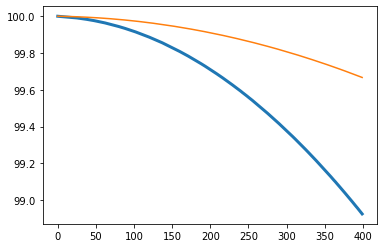

BEST MAPE: 98.92589569091797
with model #1, nb obs: 60, lr: 0.001
n_seq		 200 
n_seq_val	 40 
n_seq_test	 20 
n_obs		 60 
n_feat		 20 
n_pred		 10
X_train	 (673, 21) 	->	y_train	 (673,) 
X_val	 (192, 21) 	->	y_val	 (192,) 
X_test	 (97, 21) 	->	y_test	 (97,)
X_train_seq (200, 60, 21) 	->	y_train_seq	 (200, 10) 
X_val_seq (40, 60, 21) 	->	y_val_seq	 (40, 10) 
X_test_seq (20, 60, 21) 	->	y_test_seq	 (20, 10)
Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_98 (LSTM)              (None, 60, 30)            6240      
                                                                 
 lstm_99 (LSTM)              (None, 60, 20)            4080      
                                                                 
 lstm_100 (LSTM)             (None, 10)                1240      
                                                                 
 dense_74 (Dense)            (None, 10) 

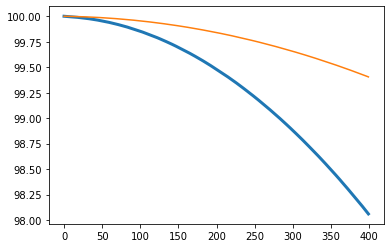

BEST MAPE: 98.06060791015625
with model #2, nb obs: 60, lr: 0.001
n_seq		 200 
n_seq_val	 40 
n_seq_test	 20 
n_obs		 60 
n_feat		 20 
n_pred		 10
X_train	 (673, 21) 	->	y_train	 (673,) 
X_val	 (192, 21) 	->	y_val	 (192,) 
X_test	 (97, 21) 	->	y_test	 (97,)
X_train_seq (200, 60, 21) 	->	y_train_seq	 (200, 10) 
X_val_seq (40, 60, 21) 	->	y_val_seq	 (40, 10) 
X_test_seq (20, 60, 21) 	->	y_test_seq	 (20, 10)
Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_101 (LSTM)             (None, 60, 30)            6240      
                                                                 
 lstm_102 (LSTM)             (None, 60, 20)            4080      
                                                                 
 lstm_103 (LSTM)             (None, 10)                1240      
                                                                 
 dense_76 (Dense)            (None, 10) 

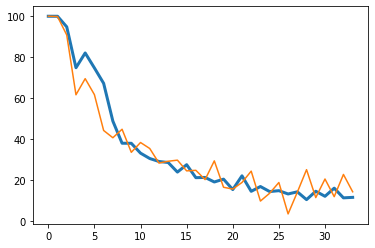

BEST MAPE: 10.60600471496582
with model #3, nb obs: 60, lr: 0.001
n_seq		 200 
n_seq_val	 40 
n_seq_test	 20 
n_obs		 60 
n_feat		 20 
n_pred		 10
X_train	 (673, 21) 	->	y_train	 (673,) 
X_val	 (192, 21) 	->	y_val	 (192,) 
X_test	 (97, 21) 	->	y_test	 (97,)
X_train_seq (200, 60, 21) 	->	y_train_seq	 (200, 10) 
X_val_seq (40, 60, 21) 	->	y_val_seq	 (40, 10) 
X_test_seq (20, 60, 21) 	->	y_test_seq	 (20, 10)
Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_104 (LSTM)             (None, 60, 30)            6240      
                                                                 
 lstm_105 (LSTM)             (None, 60, 20)            4080      
                                                                 
 lstm_106 (LSTM)             (None, 10)                1240      
                                                                 
 dense_78 (Dense)            (None, 10) 

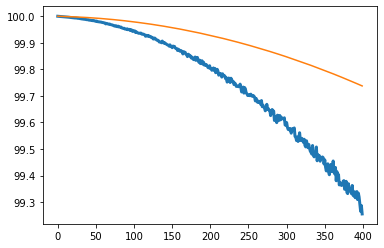

BEST MAPE: 10.60600471496582
with model #3, nb obs: 60, lr: 0.001


In [32]:
model_run(country_name='France', n_seq=200, n_obs=[60], n_feat=20, n_pred=10, split_train=0.7, split_val=0.9, learning_rates=[0.001])

In [ ]:
model_run(country_name='United Kingdom', n_seq=200, n_obs=[60], n_feat=20, n_pred=10, split_train=0.7, split_val=0.9, learning_rates=[0.001])

In [ ]:
model_run(country_name='Germany', n_seq=200, n_obs=[60], n_feat=20, n_pred=10, split_train=0.7, split_val=0.9, learning_rates=[0.001])

n_seq		 200 
n_seq_val	 40 
n_seq_test	 20 
n_obs		 60 
n_feat		 20 
n_pred		 10
X_train	 (674, 21) 	->	y_train	 (674,) 
X_val	 (193, 21) 	->	y_val	 (193,) 
X_test	 (97, 21) 	->	y_test	 (97,)
X_train_seq (200, 60, 21) 	->	y_train_seq	 (200, 10) 
X_val_seq (40, 60, 21) 	->	y_val_seq	 (40, 10) 
X_test_seq (20, 60, 21) 	->	y_test_seq	 (20, 10)
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_74 (LSTM)              (None, 60, 20)            3360      
                                                                 
 lstm_75 (LSTM)              (None, 10)                1240      
                                                                 
 dense_56 (Dense)            (None, 10)                110       
                                                                 
 dense_57 (Dense)            (None, 10)                110       
                                        

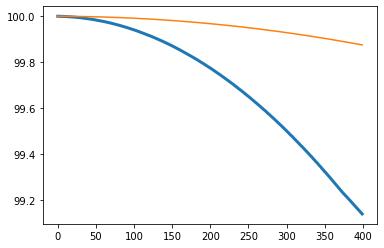

BEST MAPE: 99.13999938964844
with model #1, nb obs: 60, lr: 0.001
n_seq		 200 
n_seq_val	 40 
n_seq_test	 20 
n_obs		 60 
n_feat		 20 
n_pred		 10
X_train	 (674, 21) 	->	y_train	 (674,) 
X_val	 (193, 21) 	->	y_val	 (193,) 
X_test	 (97, 21) 	->	y_test	 (97,)
X_train_seq (200, 60, 21) 	->	y_train_seq	 (200, 10) 
X_val_seq (40, 60, 21) 	->	y_val_seq	 (40, 10) 
X_test_seq (20, 60, 21) 	->	y_test_seq	 (20, 10)
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_76 (LSTM)              (None, 60, 30)            6240      
                                                                 
 lstm_77 (LSTM)              (None, 60, 20)            4080      
                                                                 
 lstm_78 (LSTM)              (None, 10)                1240      
                                                                 
 dense_58 (Dense)            (None, 10) 

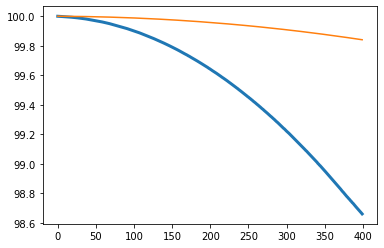

BEST MAPE: 98.6603012084961
with model #2, nb obs: 60, lr: 0.001
n_seq		 200 
n_seq_val	 40 
n_seq_test	 20 
n_obs		 60 
n_feat		 20 
n_pred		 10
X_train	 (674, 21) 	->	y_train	 (674,) 
X_val	 (193, 21) 	->	y_val	 (193,) 
X_test	 (97, 21) 	->	y_test	 (97,)
X_train_seq (200, 60, 21) 	->	y_train_seq	 (200, 10) 
X_val_seq (40, 60, 21) 	->	y_val_seq	 (40, 10) 
X_test_seq (20, 60, 21) 	->	y_test_seq	 (20, 10)
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_79 (LSTM)              (None, 60, 30)            6240      
                                                                 
 lstm_80 (LSTM)              (None, 60, 20)            4080      
                                                                 
 lstm_81 (LSTM)              (None, 10)                1240      
                                                                 
 dense_60 (Dense)            (None, 10)  

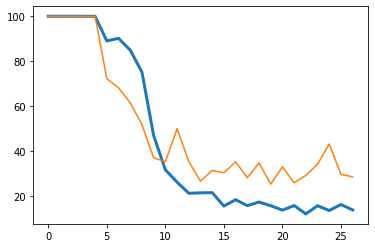

BEST MAPE: 12.063092231750488
with model #3, nb obs: 60, lr: 0.001
n_seq		 200 
n_seq_val	 40 
n_seq_test	 20 
n_obs		 60 
n_feat		 20 
n_pred		 10
X_train	 (674, 21) 	->	y_train	 (674,) 
X_val	 (193, 21) 	->	y_val	 (193,) 
X_test	 (97, 21) 	->	y_test	 (97,)
X_train_seq (200, 60, 21) 	->	y_train_seq	 (200, 10) 
X_val_seq (40, 60, 21) 	->	y_val_seq	 (40, 10) 
X_test_seq (20, 60, 21) 	->	y_test_seq	 (20, 10)
Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_82 (LSTM)              (None, 60, 30)            6240      
                                                                 
 lstm_83 (LSTM)              (None, 60, 20)            4080      
                                                                 
 lstm_84 (LSTM)              (None, 10)                1240      
                                                                 
 dense_62 (Dense)            (None, 10)

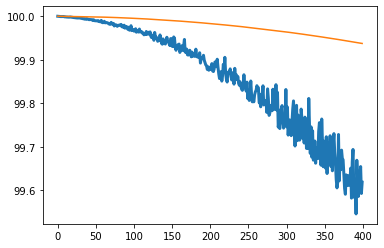

BEST MAPE: 12.063092231750488
with model #3, nb obs: 60, lr: 0.001


In [30]:
model_run(country_name='United States', n_seq=200, n_obs=[60], n_feat=20, n_pred=10, split_train=0.7, split_val=0.9, learning_rates=[0.001])

In [16]:
model_run(country_name='India', n_seq=200, n_obs=[60], n_feat=20, n_pred=10, split_train=0.7, split_val=0.9, learning_rates=[0.001])

n_seq		 200 
n_seq_val	 40 
n_seq_test	 20 
n_obs		 60 
n_feat		 20 
n_pred		 10
X_train	 (668, 21) 	->	y_train	 (668,) 
X_val	 (191, 21) 	->	y_val	 (191,) 
X_test	 (96, 21) 	->	y_test	 (96,)
X_train_seq (200, 60, 21) 	->	y_train_seq	 (200, 10) 
X_val_seq (40, 60, 21) 	->	y_val_seq	 (40, 10) 
X_test_seq (20, 60, 21) 	->	y_test_seq	 (20, 10)
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_44 (LSTM)              (None, 60, 20)            3360      
                                                                 
 lstm_45 (LSTM)              (None, 10)                1240      
                                                                 
 dense_32 (Dense)            (None, 10)                110       
                                                                 
 dense_33 (Dense)            (None, 10)                110       
                                        

/Users/tekyteka/code/Teky-Teka/covid_ts_pred/covid_ts_pred/dp_logic/RNN_model.py:203: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show();


n_seq		 200 
n_seq_val	 40 
n_seq_test	 20 
n_obs		 60 
n_feat		 20 
n_pred		 10
X_train	 (668, 21) 	->	y_train	 (668,) 
X_val	 (191, 21) 	->	y_val	 (191,) 
X_test	 (96, 21) 	->	y_test	 (96,)
X_train_seq (200, 60, 21) 	->	y_train_seq	 (200, 10) 
X_val_seq (40, 60, 21) 	->	y_val_seq	 (40, 10) 
X_test_seq (20, 60, 21) 	->	y_test_seq	 (20, 10)
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_46 (LSTM)              (None, 60, 30)            6240      
                                                                 
 lstm_47 (LSTM)              (None, 60, 20)            4080      
                                                                 
 lstm_48 (LSTM)              (None, 10)                1240      
                                                                 
 dense_34 (Dense)            (None, 10)                110       
                                        

In [17]:
model_run(country_name='Brazil', n_seq=200, n_obs=[60], n_feat=20, n_pred=10, split_train=0.7, split_val=0.9, learning_rates=[0.001])

n_seq		 200 
n_seq_val	 40 
n_seq_test	 20 
n_obs		 60 
n_feat		 20 
n_pred		 10
X_train	 (649, 21) 	->	y_train	 (649,) 
X_val	 (186, 21) 	->	y_val	 (186,) 
X_test	 (93, 21) 	->	y_test	 (93,)
X_train_seq (200, 60, 21) 	->	y_train_seq	 (200, 10) 
X_val_seq (40, 60, 21) 	->	y_val_seq	 (40, 10) 
X_test_seq (20, 60, 21) 	->	y_test_seq	 (20, 10)
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_55 (LSTM)              (None, 60, 20)            3360      
                                                                 
 lstm_56 (LSTM)              (None, 10)                1240      
                                                                 
 dense_40 (Dense)            (None, 10)                110       
                                                                 
 dense_41 (Dense)            (None, 10)                110       
                                        

/Users/tekyteka/code/Teky-Teka/covid_ts_pred/covid_ts_pred/dp_logic/RNN_model.py:203: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show();


n_seq		 200 
n_seq_val	 40 
n_seq_test	 20 
n_obs		 60 
n_feat		 20 
n_pred		 10
X_train	 (649, 21) 	->	y_train	 (649,) 
X_val	 (186, 21) 	->	y_val	 (186,) 
X_test	 (93, 21) 	->	y_test	 (93,)
X_train_seq (200, 60, 21) 	->	y_train_seq	 (200, 10) 
X_val_seq (40, 60, 21) 	->	y_val_seq	 (40, 10) 
X_test_seq (20, 60, 21) 	->	y_test_seq	 (20, 10)
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_57 (LSTM)              (None, 60, 30)            6240      
                                                                 
 lstm_58 (LSTM)              (None, 60, 20)            4080      
                                                                 
 lstm_59 (LSTM)              (None, 10)                1240      
                                                                 
 dense_42 (Dense)            (None, 10)                110       
                                        

In [ ]:
model_run(country_name='Italy', n_seq=200, n_obs=[60], n_feat=20, n_pred=10, split_train=0.7, split_val=0.9, learning_rates=[0.001])

In [ ]:
model_run(country_name='Belgium', n_seq=200, n_obs=[60], n_feat=20, n_pred=10, split_train=0.7, split_val=0.9, learning_rates=[0.001])

## **RNN** models on **FRA** country with **Sumedha**'s datasets

In [ ]:
# Sumedha train set
n_seq = 200 ## nb of sequences (samples)
n_obs = [70, 65, 60] # maxi = 96 (stay around 70 or more test_split)
n_obs = 70 # maxi = 96 (stay around 70 or more test_split)
n_feat = 20 #  X_train.shape[1] # 20 feature:
n_pred = 10 # nb of days where we can predict new daily deaths
n_pred = 1 ## <<< REMOVE AFTER OK TESTING!
n_seq_val = n_seq // 5 # number of sequences in test set ?
n_seq_test = n_seq // 10 # number of sequences in test set ?
print('n_seq\t\t', n_seq, '\nn_seq_val\t', n_seq_val, '\nn_seq_test\t', n_seq_test, '\nn_obs\t\t', n_obs, '\nn_feat\t\t', n_feat)

split_train=0.7 ; split_val=0.9

# 0. The Normalization Layer
scaler = MinMaxScaler()
scaler.fit_transform(X_ts_fra_indicator)

train = int((len(X_ts_fra_indicator)*split_train))
val = int(len(X_ts_fra_indicator)*split_val)

X_train = X_ts_fra_indicator[:train]
y_train = y_ts_fra_indicator[:train]

X_val = X_ts_fra_indicator[train:val]
y_val = y_ts_fra_indicator[train:val]

X_test = X_ts_fra_indicator[val:]
y_test = y_ts_fra_indicator[val:]


In [ ]:
model_run(country_name='France', n_seq=200, n_obs=[62, 61, 60], n_feat=20, n_pred=1, split_train=0.7, split_val=0.9, learning_rates=[0.1, 0.01, 0.001])

In [ ]:
model_run(country_name='France', n_seq=200, n_obs=[62, 61, 60], n_feat=20, n_pred=1, split_train=0.7, split_val=0.9, learning_rates=[0.1, 0.05, 0.01])

### RNN model #3 architecture 

In [ ]:
# 1. The Architecture
"""   - 3rd model layers architecture (simple -> complex) (less data -> more data) (print(loss) function check lecture)
> LSTM
"""
rnn_model_3 = Sequential()
rnn_model_3.add(normalizer) # Using the Normalization layer to standardize the datapoints during the forward pass
# Input len(train) (input_shape=(?,?))
rnn_model_3.add(LSTM(units=30, activation='tanh'))  ## , input_shape=(?,?))) without a Normalizer layer
# output return sequences = True
rnn_model_3.add(Dense(10, activation = 'relu')) ## add 1 or more 'relu' layers
# Output 10 only, no more RNN just dropout()
# rnn_model_3.add(layers.Dropout(0.3)) ## if RNN model over-fit
rnn_model_3.add(Dense(n_pred, activation = 'linear'))

### Model #1 evaluating

In [ ]:
# 4. Evaluating
# The prediction (one per sequence/city)
y_pred = rnn_model.predict(X_test) 
print(y_pred.shape)
# Distribution of the predictions
pd.DataFrame(y_pred).mean().sort_values(ascending=False)

### Time Series Forecasting with model #1

### Compile model #3 with 'rmsprop'

In [ ]:
# 2. Compiling with 'rmsprop' rather than 'adam' (recommended)
optimizer = RMSprop(
                learning_rate=0.001,
                rho=0.9,
                momentum=0.0,
                epsilon=1e-07,
                centered=False
            )
rnn_model_3.compile(loss='mse',
              optimizer= optimizer, # optimizer='rmsprop'    <- adapt learning rate
                 metrics='mape')  # Recommended optimizer for RNNs
rnn_model_3.summary()

In [ ]:
rnn_model.summary()

### Train model #2

In [ ]:
history = train_rnn_model(rnn_model, X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, patience=5, epochs=200)
plt.plot(history.history['mape'])
plt.plot(history.history['val_mape'])
plt.show();
type(history)

In [ ]:
trai### Train model #1n_series = [50, 150, 200, 300, 400]
overfit_es =   [2, 6, 6, 5, 6 ]
print('type(overfit_es), overfit_es', type(overfit_es), overfit_es)
# if overfit_es:
#     print("early stopping")
#     history = train_rnn_model(patience=overfit_es)
# else:
# print("No early stopping")
for i in range(len(train_series)):
    history = train_rnn_model(model=rnn_model_2, epochs=train_series[i], patience=overfit_es[i])
    plt.plot(history.history['mape'])
    plt.plot(history.history['val_mape'])
    plt.show();

### RNN model #3 architecture 

#### 🚀 The **LSTM (= Long Short Term Memory)** with their ability to *avoid the vanishing gradient problem*, should be preferred over a SimpleRNN.

In [ ]:
# 1. The Architecture
"""   - 3rd model layers architecture (simple -> complex) (less data -> more data) (print(loss) function check lecture)
> LSTM
"""
rnn_model_3 = Sequential()
rnn_model_3.add(normalizer) # Using the Normalization layer to standardize the datapoints during the forward pass
# Input len(train) (input_shape=(?,?))
rnn_model_3.add(LSTM(units=30, activation='tanh'))  ## , input_shape=(?,?))) without a Normalizer layer
# output return sequences = True
rnn_model_3.add(Dense(10, activation = 'relu')) ## add 1 or more 'relu' layers
# Output 10 only, no more RNN just dropout()
# rnn_model_3.add(layers.Dropout(0.3)) ## if RNN model over-fit
rnn_model_3.add(Dense(n_pred, activation = 'linear'))

### Compile model #3 with 'rmsprop'

In [ ]:
# 2. Compiling with 'rmsprop' rather than 'adam' (recommended)
optimizer = RMSprop(
                learning_rate=0.001,
                rho=0.9,
                momentum=0.0,
                epsilon=1e-07,
                centered=False
            )
rnn_model_3.compile(loss='mse',
              optimizer= optimizer, # optimizer='rmsprop'    <- adapt learning rate
                 metrics='mape')  # Recommended optimizer for RNNs
rnn_model_3.summary()

### Train model #2

### RNN model #3 architecture 

In [ ]:
# 1. The Architecture
"""   - 3rd model layers architecture (simple -> complex) (less data -> more data) (print(loss) function check lecture)
> LSTM
"""
rnn_model_3 = Sequential()
rnn_model_3.add(normalizer) # Using the Normalization layer to standardize the datapoints during the forward pass
# Input len(train) (input_shape=(?,?))
rnn_model_3.add(LSTM(units=30, activation='tanh'))  ## , input_shape=(?,?))) without a Normalizer layer
# output return sequences = True
rnn_model_3.add(Dense(10, activation = 'relu')) ## add 1 or more 'relu' layers
# Output 10 only, no more RNN just dropout()
# rnn_model_3.add(layers.Dropout(0.3)) ## if RNN model over-fit
rnn_model_3.add(Dense(n_pred, activation = 'linear'))

### Compile model #3 with 'rmsprop'

In [ ]:
# 2. Compiling with 'rmsprop' rather than 'adam' (recommended)
optimizer = RMSprop(
                learning_rate=0.001,
                rho=0.9,
                momentum=0.0,
                epsilon=1e-07,
                centered=False
            )
rnn_model_3.compile(loss='mse',
              optimizer= optimizer, # optimizer='rmsprop'    <- adapt learning rate
                 metrics='mape')  # Recommended optimizer for RNNs
rnn_model_3.summary()

### Train model #3

### Train model #2

In [ ]:
# min(history.history['mape'])

# print("adjust early stopping")
# overfit_es = [d[0]+1 for d in enumerate(history.history['mape']) if d[1] == min(history.history['mape'])][0]
# overfit_es

In [ ]:
min(history.history['mape']), max(history.history['mape']), history.history['mape'] # blue line

In [ ]:
max(history.history['val_mape']), history.history['val_mape'] # orange line

### Model #1 evaluating

In [ ]:
# 4. Evaluating
# The prediction (one per sequence/city)
y_pred = rnn_model.predict(X_test) 
print(y_pred.shape)
# Distribution of the predictions
pd.DataFrame(y_pred).mean().sort_values(ascending=False)

### Time Series Forecasting with model #1

In [ ]:
# Check your code below
assert y_pred.shape == (n_seq_test, n_pred)
# Distribution of the real values y_train
pd.DataFrame(y_train).mean().sort_values(ascending=False)

In [ ]:
# Distribution of the real values y_train
pd.DataFrame(y_train).mean().sort_values(ascending=False)

In [ ]:
trai### Train model #1n_series = [50, 150, 200, 300, 400]
overfit_es =   [2, 6, 6, 5, 6 ]
print('type(overfit_es), overfit_es', type(overfit_es), overfit_es)
# if overfit_es:
#     print("early stopping")
#     history = train_rnn_model(patience=overfit_es)
# else:
# print("No early stopping")
for i in range(len(train_series)):
    history = train_rnn_model(model=rnn_model_2, X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, epochs=train_series[i], patience=overfit_es[i])
    plt.plot(history.history['mape'])
    plt.plot(history.history['val_mape'])
    plt.show();

In [ ]:
data_index=data_index.set_index('date')